年龄和尺寸的关系

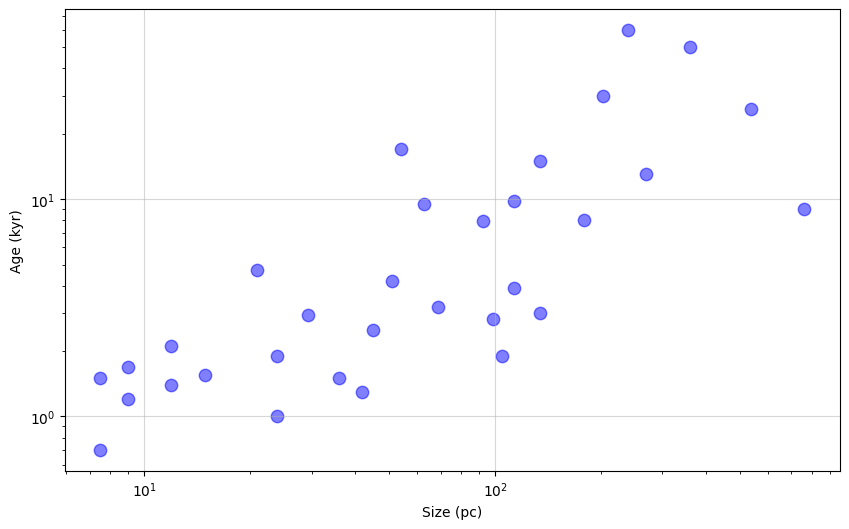

<Figure size 640x480 with 0 Axes>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_merge = pd.read_csv("../cat/publish.csv")
# 添加一列为物理尺度
df_merge["size_pc"] = df_merge["size_coarse (arcmin)"] * np.deg2rad(np.nanmean(df_merge['distance_min (kpc)']+df_merge['distance_max (kpc)'])/60) * 1e3
df_merge.head()
# 绘制物理尺度随年龄的分布
plt.figure(figsize=(10, 6))
# 筛选出年龄不为nan的行
df_merge_filter = df_merge[df_merge["age_min (yr)"].notnull()]
age = df_merge_filter["age_min (yr)"] / 1e3  # 转为 kyr
plt.scatter( df_merge_filter ["size_pc"],age, s=80, color="blue", alpha=0.5)
plt.xlabel("Size (pc)")
plt.ylabel("Age (kyr)")
plt.loglog()
plt.grid(True, alpha=0.5)
plt.show()
plt.close()
plt.savefig("../figures/size_age.png")

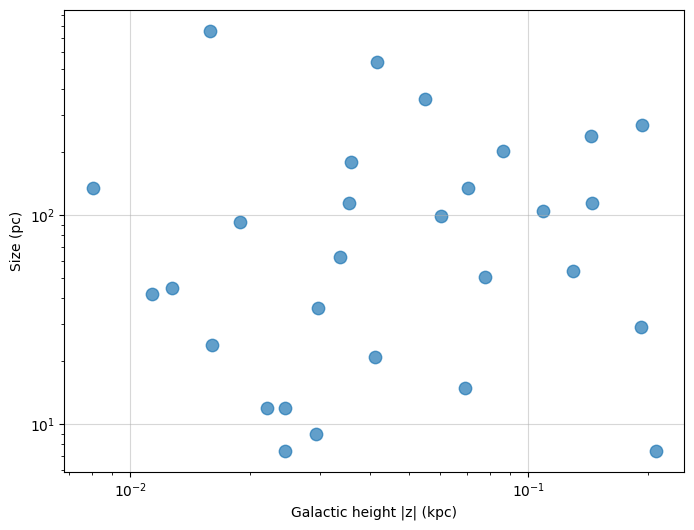

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# 筛选出年龄和距离均不为 nan 的行
# df_merge_filter = df_merge[df_merge["age_min (yr)"].notnull() & df_merge["distance (kpc)"].notnull()]

# 计算 z = d * sin(b)，转换单位
b_rad = np.radians(df_merge_filter["b"])  # 将银纬 b 转换为弧度
z_kpc_min = df_merge_filter["distance_min (kpc)"] * np.sin(b_rad)  # 计算 z
z_kpc_max = df_merge_filter["distance_max (kpc)"] * np.sin(b_rad)  # 计算 z
z_kpc = np.abs((z_kpc_min + z_kpc_max) / 2)  # 取 z 的绝对值

# 计算年龄（转换为 kyr）
age_kyr = df_merge_filter["age_min (yr)"] / 1e3  

# 绘图
plt.scatter(abs(z_kpc), df_merge_filter["size_pc"], alpha=0.7, s=80,)
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Galactic height |z| (kpc)")
plt.ylabel("Size (pc)")
plt.grid(True, alpha=0.5)
plt.loglog()
# 保存图片
plt.savefig("../figures/size-z.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

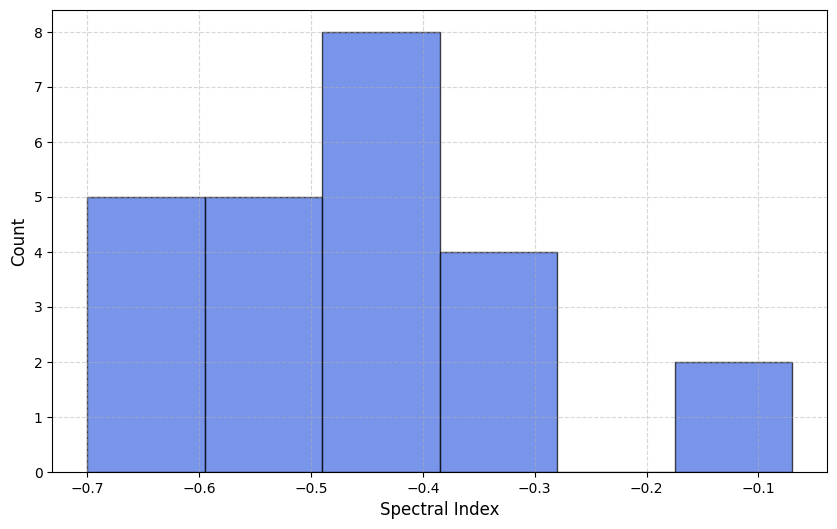

<Figure size 640x480 with 0 Axes>

In [7]:

import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df_merge = pd.read_csv("../cat/publish.csv")

df_merge_now = df_merge[(df_merge["s"] != "varies") & (~df_merge["s"].astype(str).str.contains("\?"))].copy()

# 转换为浮点数
df_merge_now["s"] = df_merge_now["s"].astype(float)

# 绘制直方图
plt.figure(figsize=(10, 6))
plt.hist(-df_merge_now["s"], bins="sturges", color="royalblue", alpha=0.7, edgecolor="black")

# 添加标签
plt.xlabel("Spectral Index", fontsize=12)
plt.ylabel("Count", fontsize=12)
# plt.title("Distribution of Spectral Index", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)

# 显示图像
plt.show()
plt.close()
plt.savefig("../figures/spectral_index.png")